In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [89]:
data=pd.read_csv("train.csv",index_col=False)

In [90]:
df=data.copy()

In [91]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [92]:
df=df.drop(columns='Id')

## Handelling Missing Values

In [93]:
df.isna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [94]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [95]:
df.isnull().sum().sum()

6965

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [101]:
df.shape

(1460, 80)

In [ ]:
df=df[['']]

### Methods:
1) Bottom FIll


2) Top Fill


3) Interplolate


4) Fillna


## Assumption for Linear Regression
#### 1) Heterokedasticity :-  All the Independant Variavle we are taking should be distributed in different ways
#### 2) Multi-Colinearity :- All Independent variable  are corelated with each other
#### 3) Auto Correlation  :- Dependent variable and Independent variable should be correlated

Heterokedasticity should Pass and Multi-Colinearity should fail i.e 

    -> All the Independant Variavle we are taking should be distributed in different ways
    -> All Independent variable  should not corelated with each other

TO check Heterokedasticity

    -> Skewness
    -> Krutosis
    -> Histogram 
    -> Boxplot


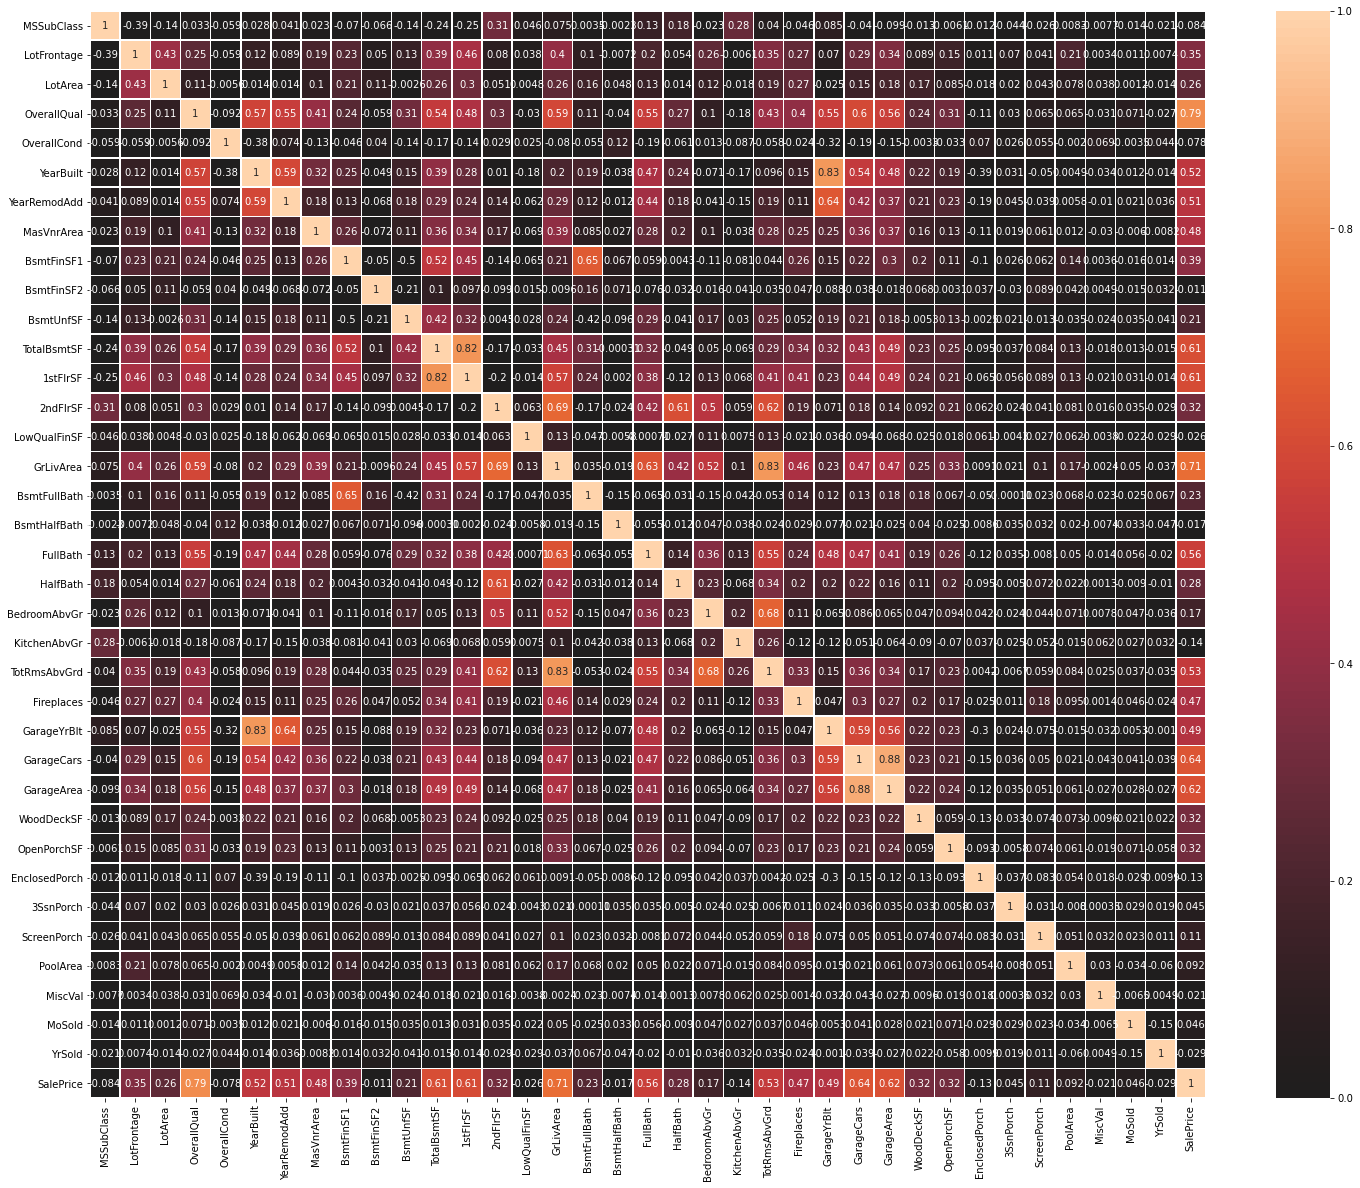

In [123]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.5,annot=True,vmin=0, vmax=1, center=0)




In [125]:
df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [249]:
df=df[['OverallQual','GarageArea','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','SalePrice']]
df

,OverallQual,GarageArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,SalePrice
0,7,548,856,856,1710,2,208500
1,6,460,1262,1262,1262,2,181500
2,7,608,920,920,1786,2,223500
3,7,642,756,961,1717,3,140000
4,8,836,1145,1145,2198,3,250000
...,...,...,...,...,...,...,...
1455,6,460,953,953,1647,2,175000
1456,6,500,1542,2073,2073,2,210000
1457,7,252,1152,1188,2340,1,266500
1458,5,240,1078,1078,1078,1,142125


### Auto Correlation  & Multi-Colinearity Fails

In [132]:
df.corr()

,OverallQual,GarageArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,SalePrice
OverallQual,1.000000,0.562022,0.537808,0.476224,0.593007,0.600671,0.790982
GarageArea,0.562022,1.000000,0.486665,0.489782,0.468997,0.882475,0.623431
TotalBsmtSF,0.537808,0.486665,1.000000,0.819530,0.454868,0.434585,0.613581
1stFlrSF,0.476224,0.489782,0.819530,1.000000,0.566024,0.439317,0.605852
GrLivArea,0.593007,0.468997,0.454868,0.566024,1.000000,0.467247,0.708624
GarageCars,0.600671,0.882475,0.434585,0.439317,0.467247,1.000000,0.640409
SalePrice,0.790982,0.623431,0.613581,0.605852,0.708624,0.640409,1.000000


### Heterokedasticity

In [133]:
df.columns

Index(['OverallQual', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'SalePrice'],
      dtype='object')

In [143]:
for i in df.columns:
    print(f"Skewness of {i}  is : {df[i].skew()}")

Skewness of OverallQual  is : 0.2169439277628693
Skewness of GarageArea  is : 0.17998090674623907
Skewness of TotalBsmtSF  is : 1.5242545490627664
Skewness of 1stFlrSF  is : 1.3767566220336365
Skewness of GrLivArea  is : 1.3665603560164552
Skewness of GarageCars  is : -0.3425489297486655
Skewness of SalePrice  is : 1.8828757597682129


In [144]:
for i in df.columns:
    print(f"Krutosis of {i}  is : {df[i].kurt()}")

Krutosis of OverallQual  is : 0.09629277835615113
Krutosis of GarageArea  is : 0.9170672022708684
Krutosis of TotalBsmtSF  is : 13.250483281984796
Krutosis of 1stFlrSF  is : 5.74584148244079
Krutosis of GrLivArea  is : 4.895120580693174
Krutosis of GarageCars  is : 0.22099776396532844
Krutosis of SalePrice  is : 6.536281860064529


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000070C0ED7390>,
      dtype=object)

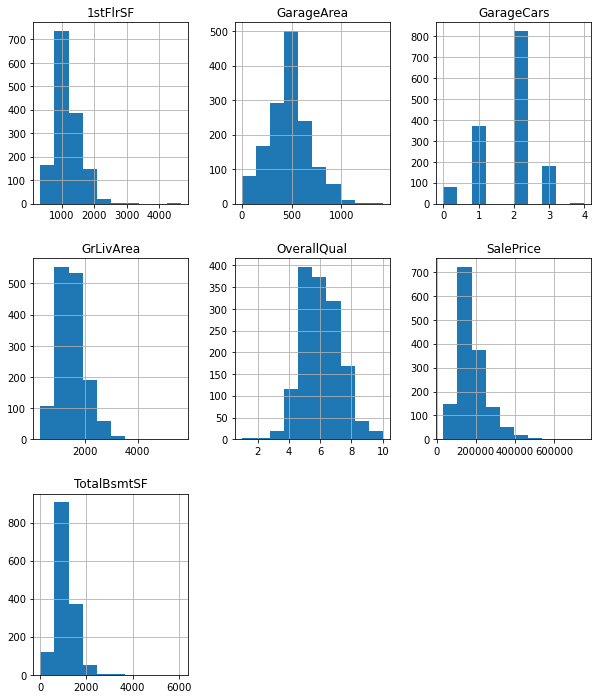

In [151]:
df.hist(figsize=(10,12),bins=10)


{'boxes': [<matplotlib.lines.Line2D at 0x70c46d4278>],
 'caps': [<matplotlib.lines.Line2D at 0x70c76fa208>,
 'fliers': [<matplotlib.lines.Line2D at 0x70bdee3a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x70bde63128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x70c46d47f0>,
  <matplotlib.lines.Line2D at 0x70c4710e48>]}

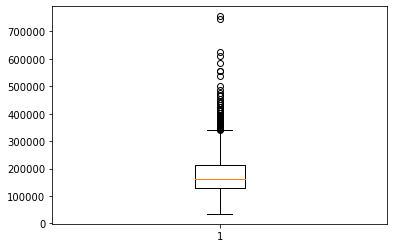

In [161]:
plt.boxplot(df["SalePrice"])


{'boxes': [<matplotlib.lines.Line2D at 0x70c091e828>],
 'caps': [<matplotlib.lines.Line2D at 0x70c0aa2c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x70c0e99b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x70c0e99cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x70c091e6d8>,
  <matplotlib.lines.Line2D at 0x70c0aa2748>]}

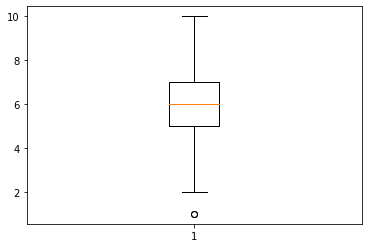

In [162]:
plt.boxplot(df["OverallQual"])

{'boxes': [<matplotlib.lines.Line2D at 0x70c7a9a358>],
 'caps': [<matplotlib.lines.Line2D at 0x70c7a9a780>,
 'fliers': [<matplotlib.lines.Line2D at 0x70c80852b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x70c8085d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x70c7a9a278>,
  <matplotlib.lines.Line2D at 0x70c7a9a0b8>]}

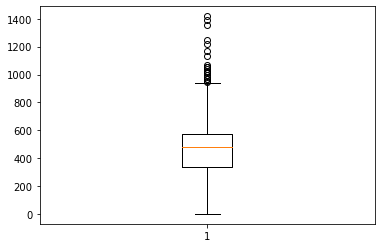

In [164]:
plt.boxplot(df["GarageArea"])

#### Seaborn Box Plot Draw a box plot to show distributions with respect to categories.

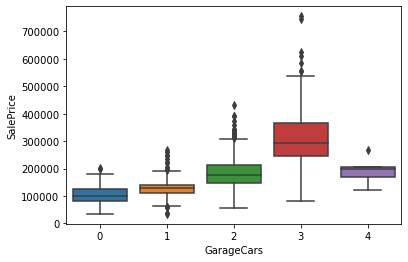

In [176]:

sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

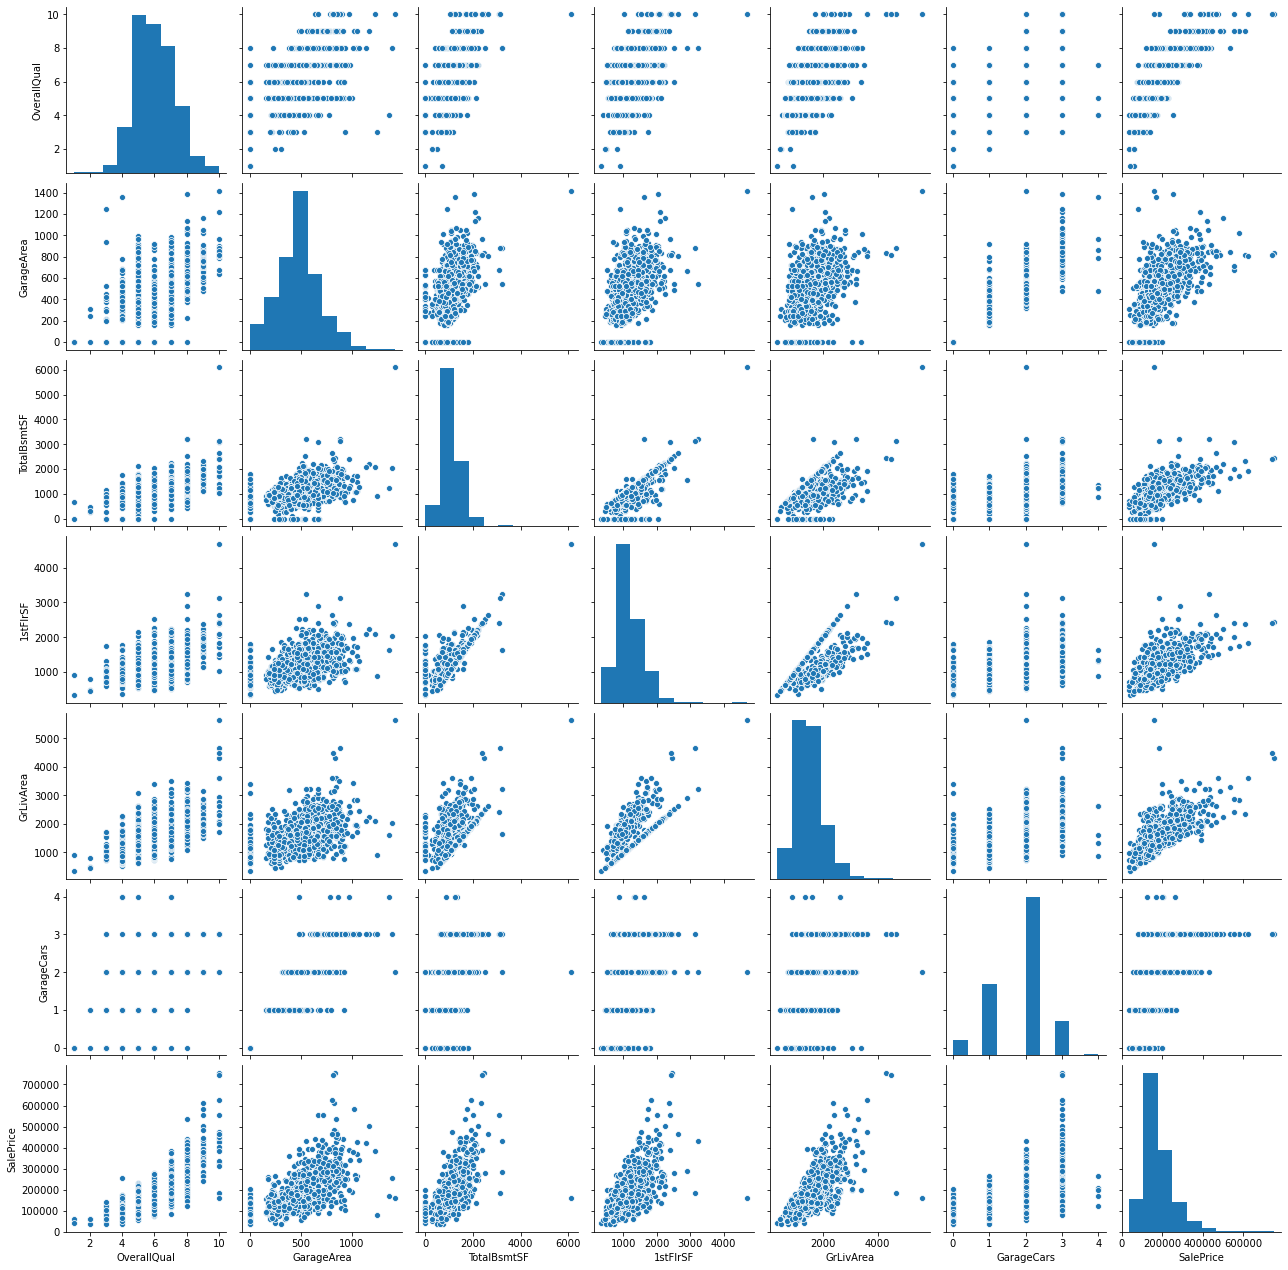

In [165]:
sns.pairplot(df)

### MODEL DEVELOPEMENT 

### Split Data

In [177]:
df_IV=df[['OverallQual','GarageArea','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars']]
df_DV=df['SalePrice']

In [178]:
df_IV.isna().sum()

OverallQual    0
GarageArea     0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
dtype: int64

In [179]:
df_DV.isnull().sum()

0

In [180]:
print(df_IV.shape)
print(df_DV.shape)


(1460, 6)
(1460,)


### Training Data

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,y_train,y_test=train_test_split(df_IV,df_DV,test_size=0.2,random_state=2)

In [193]:
print(X_train.shape,y_train.shape)

(1168, 6) (1168,)


In [194]:
print(X_test.shape,y_test.shape)

(292, 6) (292,)


In [188]:
print("Training Data is 80% of orignal Data so X_train is",1460*80/100) 

Training Data is 80% of orignal Data so X_train is 1168.0


In [190]:
print("Testing Data is 80% of orignal Data so X_train is",1460*20/100) 

Testing Data is 80% of orignal Data so X_train is 292.0


### Creating Model

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lin_regression=LinearRegression()

In [198]:
lin_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Coefficient and Intercept

In [199]:
lin_regression.coef_

array([2.38202003e+04, 1.37442922e+01, 2.29674665e+01, 1.22474843e+01,
       4.09575211e+01, 1.56670522e+04])

In [200]:
lin_regression.intercept_

-98958.65548246127

#### Prediction

In [212]:
y_predict=lin_regression.predict(X_test)

In [216]:
y_predict.shape

(292,)

In [215]:
y_test.shape

(292,)

In [225]:
y_predict

array([236065.47067792, 181762.04543361, 304901.92977962, 225483.48479221,
       209211.30556536, 223199.3248121 , 226413.04456092, 185035.5606183 ,
       106978.96413618, 312943.69108454, 204595.68153854, 209211.30556536,
       120691.98641817, 139651.39203117, 106024.08192622, 247874.44079152,
       265214.27939794, 311003.73239855, 213661.38501186, 312731.854515  ,
       315530.44693796, 167423.56949306, 193716.69558943, 233824.09367483,
       365523.53582538, 237376.74496628, 189245.44416799, 254211.64316921,
       221129.54609354, 348937.12112852, 298358.50315861, 188274.54434116,
       270404.79951712,  99361.71694383, 205480.31740385, 233790.2971996 ,
       136967.87154356, 297826.82218948, 315141.3768271 , 313464.45547939,
       169480.93535952, 180483.77710214, 138612.53372575,  85549.22098662,
        84482.74136685, 236931.13896764,  71913.77886643, 158743.96849159,
        81973.5628594 , 123099.28108901, 159911.69688046,  79758.35939496,
       249615.08594334, 1

In [224]:
y_test

503     289000
101     178000
608     359100
1089    197000
819     224000
         ...  
816     137000
1273    177000
285     164700
194     127000
318     260000
Name: SalePrice, Length: 292, dtype: int64

#### Prediction(y_predict) and Orignal(y) Data Frame


In [222]:
data = {'Y': y_test, 'Y_predict':y_predict}

predictdf=pd.DataFrame(data)

In [223]:
predictdf

,Y,Y_predict
503,289000,236065.470678
101,178000,181762.045434
608,359100,304901.929780
1089,197000,225483.484792
819,224000,209211.305565
...,...,...
816,137000,116370.930435
1273,177000,159520.858596
285,164700,179580.083187
194,127000,106460.404977


#### Accuraccy

In [244]:
from sklearn.metrics import r2_score,mean_squared_error

In [245]:
mean_squar_error=mean_squared_error(y_test,y_predict)
root_mean_squar_error=np.sqrt(mean_squar_error)
r_squar=r2_score(y_test,y_predict)


In [248]:
#An R2 score near 1 means that the model is able to predict the data very well
print(f" R squar value is : {r_squar}")
print(f" RMSE squar value is : {root_mean_squar_error}")

 R squar value is : 0.8339814596476471
 RMSE squar value is : 33157.48521432215


### Mean absolute error: This is the average of absolute errors of all the data points in the given dataset.
### Mean squared error: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
#### Median absolute error: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
### Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
### R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

In [253]:
Predicted_Price=lin_regression.predict([[7,548,856,856,1710,2]])

In [254]:
print(" Predicted_Price:  ",Predicted_Price)

 Predicted_Price:   [206830.08237659]
